# Imports

In [6]:
import pandas as pd
import numpy as np
import cross_validation as cv
import random

from tabulate import tabulate
from cross_validation import runCrossValidation
from imblearn.ensemble import BalancedRandomForestClassifier

# Load data

In [3]:
#train
x_train_df5 = pd.read_pickle(r'../data/interim/x_train_df5_round1.pkl')
y_train_df5 = pd.read_pickle(r'../data/interim/y_train_df5_round1.pkl')

#validation
x_val_ml = pd.read_pickle(r'../data/interim/x_val_ml_round1.pkl')
y_val = pd.read_pickle(r'../data/interim/y_val_round1.pkl')

#test
x_test = pd.read_pickle(r'../data/interim/x_test_round1.pkl')
y_test = pd.read_pickle(r'../data/interim/y_test_round1.pkl')

# 13.2 Balanced random forest classifier

In [18]:
## session with high processing time: 34m 34.44s
## results compiled in the following table

param = {
    'n_estimators':  [100, 200, 300, 400, 500],
    'min_samples_split':  [2,3,4], 
    'max_depth': [3,5,9],
    'min_samples_leaf': [1,2,3],
    'sampling_strategy': ['auto', 0.14, 0.17, 0.2],
    'replacement': [False, True]
}


max_eval = 5


for i in range(max_eval):
    # random choice of dictionary values
    hp = {k: random.sample(v,1)[0] for k, v in param.items()}
    print(hp)

    # model definition
    balrf_model = BalancedRandomForestClassifier(n_estimators = hp['n_estimators'], 
                                                 min_samples_split = hp['min_samples_split'],
                                                 max_depth = hp['max_depth'],
                                                 min_samples_leaf = hp['min_samples_leaf'],
                                                 sampling_strategy = hp['sampling_strategy'],
                                                 replacement = hp['replacement'],
                                                 n_jobs = -1)
    
    display(cv.runCrossValidation(balrf_model, x_train_df5, x_val_ml,y_train_df5,y_val, n_splits = 10, n_repeats = 2, top_k = 12200))
    




{'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'sampling_strategy': 0.14, 'replacement': False}


,mean,std
precision_at_k,0.280280,0.001732
recall_at_k,0.915141,0.005660


{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'sampling_strategy': 0.14, 'replacement': False}


,mean,std
precision_at_k,0.282047,0.001549
recall_at_k,0.920908,0.005070


{'n_estimators': 400, 'min_samples_split': 4, 'max_depth': 3, 'min_samples_leaf': 2, 'sampling_strategy': 'auto', 'replacement': False}


,mean,std
precision_at_k,0.279178,0.001459
recall_at_k,0.911542,0.004774


{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'min_samples_leaf': 2, 'sampling_strategy': 0.2, 'replacement': False}


,mean,std
precision_at_k,0.280362,0.001647
recall_at_k,0.915409,0.005384


{'n_estimators': 300, 'min_samples_split': 4, 'max_depth': 5, 'min_samples_leaf': 2, 'sampling_strategy': 'auto', 'replacement': True}


,mean,std
precision_at_k,0.280706,0.001565
recall_at_k,0.916533,0.005139


In [19]:
resultados_finais = {'model':['#1', '#2', '#3', '#4', '#5'],
                     'precision_at_k': ['0.280280 +/- 0.001732',
                                        '0.282047 +/- 0.001549',
                                        '0.279178 +/- 0.001459',
                                        '0.280362 +/- 0.001647',
                                        '0.280706 +/- 0.001565'],
                     'recall_at_k': ['0.915141 +/- 0.005660',
                                     '0.920908 +/- 0.005070',
                                     '0.911542 +/- 0.004774',
                                     '0.915409 +/- 0.005384',
                                     '0.916533 +/- 0.005139'],
                     'Parameters': ["'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'sampling_strategy': 0.14, 'replacement': False",
                                    "'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'sampling_strategy': 0.14, 'replacement': False",
                                    "'n_estimators': 400, 'min_samples_split': 4, 'max_depth': 3, 'min_samples_leaf': 2, 'sampling_strategy': 'auto', 'replacement': False",
                                    "'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'min_samples_leaf': 2, 'sampling_strategy': 0.2, 'replacement': False",
                                    "'n_estimators': 300, 'min_samples_split': 4, 'max_depth': 5, 'min_samples_leaf': 2, 'sampling_strategy': 'auto', 'replacement': True"]
                       }

print(tabulate(resultados_finais, headers=['model','precision@k','recall@k', 'hyperparameters'], tablefmt="fancy_grid"))

╒═════════╤═══════════════════════╤═══════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ model   │ precision@k           │ recall@k              │ hyperparameters                                                                                                                       │
╞═════════╪═══════════════════════╪═══════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ #1      │ 0.280280 +/- 0.001732 │ 0.915141 +/- 0.005660 │ 'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'sampling_strategy': 0.14, 'replacement': False   │
├─────────┼───────────────────────┼───────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ #2      │ 0.282047

The results were similar between the different hyperparameter configurations. For the final evaluation, we will choose #2.

# 13.2.1 Model training and ranked list export

In [26]:
 # model definition
balrf_model = BalancedRandomForestClassifier(n_estimators = 300, 
                                             min_samples_split = 2,
                                             max_depth = 9,
                                             min_samples_leaf = 1,
                                             sampling_strategy = 0.14,
                                             replacement = False,
                                             n_jobs = -1)

# model training
balrf_model.fit(x_train_df5, y_train_df5)

# model prediction (proba)
yhat_proba = balrf_model.predict_proba(x_val_ml)

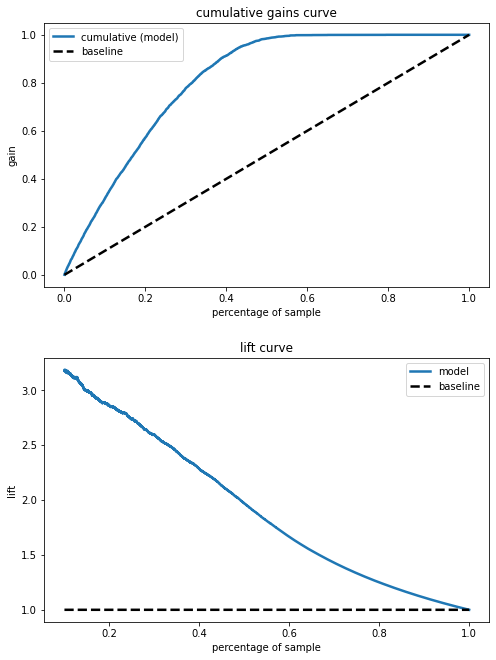

In [27]:
table = cv.gain_lift_curve(yhat_proba,y_val)
metrics, new_table = cv.precision_recall_at_k(table, 12200)
new_table.to_pickle(r"../data/processed/balrf_table.pkl")